# 0.0 Imports

In [197]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import datetime

# 1.0 Helper Functions

# 2.0 Data Collection

Data from Kaggle Airbnb competition: https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/data

In [134]:
df_users_raw = pd.read_csv("../data/train_users_2.csv")
df_countries_raw = pd.read_csv("../data/countries.csv")
df_age_gender_raw = pd.read_csv("../data/age_gender_bkts.csv")
df_sessions_raw = pd.read_csv("../data/sessions.csv", low_memory=True)

# 3.0 Data description

## Users 

In [135]:
df_users_01 = df_users_raw.copy()

#### Data Dictionary

* <b>id</b>: user id
* <b>date_account_created</b>: the date of account creation
* <b>timestamp_first_active</b>: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
* <b>date_first_booking</b>: date of first booking
* <b>gender</b>: user gender
* <b>age</b>: user age
* <b>signup_method</b>: what method user used to create the account (basic login and password, using google or facebook)
* <b>signup_flow</b>: the page a user came to signup up from
* <b>language</b>: international language preference
* <b>affiliate_channel</b>: column tells us what type of paid marketing was used. For example, if Airbnb used search engines to attract new users, it would fall under the SEM (Search Engine Marketing) category. Similarly, if Airbnb sent emails to attract new users, it would fall under the email marketing category.
* <b>affiliate_provider</b>:  tells us which company or platform was used for the paid marketing campaign.
* <b>first_affiliate_tracked</b>: whats the first marketing the user interacted with before the signing up
* <b>signup_app</b>: contains the name of the application or website that the user used to create their Airbnb account, such as "Web", "iOS", "Android", or "Moweb"
* <b>first_device_type</b>: type of device used by the user to sign up for their Airbnb account, such as a desktop computer, smartphone, tablet, or other type of device.
* <b>first_browser</b>:  contains the name of the web browser that the user used to sign up for their Airbnb account, such as Google Chrome, Mozilla Firefox, Safari, Internet Explorer, or others.
* <b>country_destination</b>: this is the target variable you are to predict

In [136]:
df_users_01.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Data Dimension

In [137]:
df_users_01.shape

(213451, 16)

### Data Types

In [138]:
df_users_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

### Change dtypes

In [139]:
#date_account_created; object -> date
df_users_01['date_account_created'] = pd.to_datetime(df_users_01['date_account_created'])

#timestamp_first_active; int -> date
df_users_01['date_first_active'] = pd.to_datetime(df_users_01['timestamp_first_active'], format='%Y%m%d%H%M%S').dt.date
df_users_01 = df_users_01.drop('timestamp_first_active', axis=1)
df_users_01['date_first_active'] = pd.to_datetime(df_users_01['date_first_active'])

#date_first_booking; object -> date
df_users_01['date_first_booking'] = pd.to_datetime(df_users_01['date_first_booking'])

#age; float64 -> int32
df_users_01['age'] = pd.to_numeric(df_users_01['age'], errors='coerce').astype('Int64')

### Check duplicates

In [140]:
df_users_01[df_users_01.duplicated()]

,id,date_account_created,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active


No duplicates.

## Countries

In [141]:
df_countries_01 = df_countries_raw.copy()

#### Data Dictionary

* <b>country_destination</b>: country
* <b>lat_destination</b>: latitude of geographical center of the country
* <b>lng_destination</b>: longitude of geographical center of the country
* <b>distance_km</b>: distance between US and the country
* <b>distance_km2</b>: squared distance between US and the country
* <b>destination_language</b>: language of the country
* <b>language_levenshtein_distance</b>: 

In [142]:
df_countries_01.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


### Data Dimension

In [143]:
df_countries_01.shape

(10, 7)

### Data Types

In [144]:
df_countries_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


### Change dtypes

No changes.

### Check duplicates

In [145]:
df_countries_01[df_countries_01.duplicated()]

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance


No duplicates.

## Population

In [146]:
df_age_gender_01 = df_age_gender_raw.copy()

#### Data Dictionary

* <b>age_bucket</b>: age group
* <b>country_destination</b>: country
* <b>gender</b>: gender being analysed
* <b>population_in_thousands</b>: population of that age bucket
* <b>year</b>: year the data was collected

In [147]:
df_age_gender_01.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


### Data Dimension

In [148]:
df_age_gender_01.shape

(420, 5)

### Data Types

In [149]:
df_age_gender_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


### Change dtypes

In [150]:
#year: float64 --> int64
df_age_gender_01['year'] = df_age_gender_01['year'].astype('int')

### Check duplicates

In [151]:
df_age_gender_01[df_age_gender_01.duplicated()]

,age_bucket,country_destination,gender,population_in_thousands,year


No duplicates.

## Sessions

In [152]:
df_sessions_01 = df_sessions_raw.copy()

#### Data Dictionary

* <b>user_id</b>
* <b>action</b>
* <b>action_type</b>
* <b>action_detail</b>
* <b>device_type</b>
* <b>secs_elapsed</b>

In [153]:
df_sessions_01.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


### Data Dimension

In [154]:
df_sessions_01.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


### Data Types

In [155]:
df_sessions_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


### Missing

In [156]:
df_sessions_01.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

### Change dtypes

No changes.

### Check duplicates

In [157]:
df_sessions_01[df_sessions_01.duplicated()]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
430,qtw88d9pbl,show,NaN,NaN,Mac Desktop,180.0
605,qtw88d9pbl,show,NaN,NaN,Mac Desktop,149.0
645,qtw88d9pbl,similar_listings,data,similar_listings,Mac Desktop,193.0
659,qtw88d9pbl,show,NaN,NaN,Mac Desktop,94.0
709,qtw88d9pbl,show,view,p3,Mac Desktop,2333.0
...,...,...,...,...,...,...
10566578,ozb2z0km6l,show,view,p3,Android Phone,753.0
10566603,ozb2z0km6l,show,view,p3,Android Phone,730.0
10566867,gpijioh4eh,similar_listings,data,similar_listings,Mac Desktop,171.0
10567058,3ptlvdxss9,personalize,data,wishlist_content_update,Windows Desktop,2840.0


É razoável que tenhamos linhas duplicadas nessa tabela, uma vez que um mesmo usuário pode ter realizado a mesma ação, no mesmo device. Agora se tiver alguma linha que o TEMPO da sessão também seja igual aí seria estranho.

In [158]:
df_sessions_01[df_sessions_01.duplicated(subset=None, keep=False)]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
420,qtw88d9pbl,show,NaN,NaN,Mac Desktop,180.0
430,qtw88d9pbl,show,NaN,NaN,Mac Desktop,180.0
520,qtw88d9pbl,show,NaN,NaN,Mac Desktop,94.0
522,qtw88d9pbl,show,view,p3,Mac Desktop,2333.0
585,qtw88d9pbl,similar_listings,data,similar_listings,Mac Desktop,193.0
...,...,...,...,...,...,...
10566867,gpijioh4eh,similar_listings,data,similar_listings,Mac Desktop,171.0
10567053,3ptlvdxss9,personalize,data,wishlist_content_update,Windows Desktop,2840.0
10567058,3ptlvdxss9,personalize,data,wishlist_content_update,Windows Desktop,2840.0
10567675,fa6260ziny,personalize,data,wishlist_content_update,Windows Desktop,69.0


# 4.0 Descriptive Statistics

## Users 

In [159]:
df_users_02 = df_users_01.copy()
df_users_02.drop('id', axis=1, inplace=True)

In [160]:
df_users_02.head()

,date_account_created,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,2010-06-28,NaT,-unknown-,<NA>,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,2011-05-25,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,2010-09-28,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,2011-12-05,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,2010-09-14,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


In [161]:
cat_attributes_users = df_users_02.select_dtypes(include=['object'])
num_attributes_users = df_users_02.select_dtypes(include=['int', 'float'])

### Numerical Attributes

In [162]:
m1 = num_attributes_users.describe()
m1.loc['skewness'] = num_attributes_users.apply(lambda x: x.skew()).tolist()
m1.loc['kurtosis'] = num_attributes_users.apply(lambda x: x.kurtosis()).tolist()
m1.T

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
age,125461.0,49.668335,155.666612,1.0,28.0,34.0,43.0,2014.0,12.422586,153.568929
signup_flow,213451.0,3.267387,7.637707,0.0,0.0,0.0,0.0,25.0,2.234366,3.324444


Pontos para ver se faz sentido:

* idade minima 1 e máxima 2015?
* signup_flow maximo 25?

Interpretação das métricas:

* skewness da idade é positiva (cauda a direita), mas isso é provavelmente devido aos outliers que tem na variável idade.

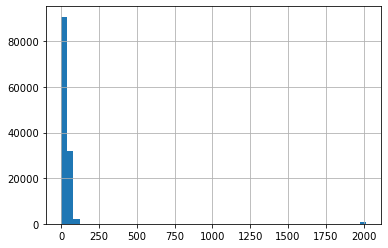

In [163]:
df_users_02.age.hist(bins=50)
plt.show()

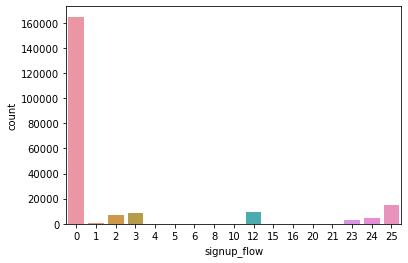

In [164]:
sns.countplot(data=df_users_02, x='signup_flow')
plt.show()

### Categorical Attributes

In [165]:
cat_attributes_users.describe()

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,213451,213451,213451,207386,213451,213451,213451,213451
unique,4,3,25,8,18,7,4,9,52,12
top,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,95688,152897,206314,137727,137426,109232,182717,89600,63845,124543


gender: 
['-unknown-' 'MALE' 'FEMALE' 'OTHER'] 



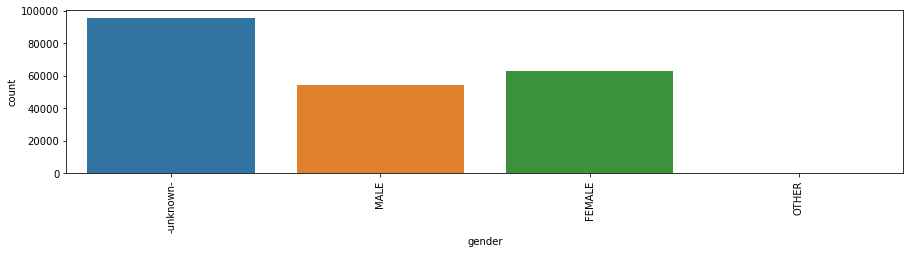

signup_method: 
['facebook' 'basic' 'google'] 



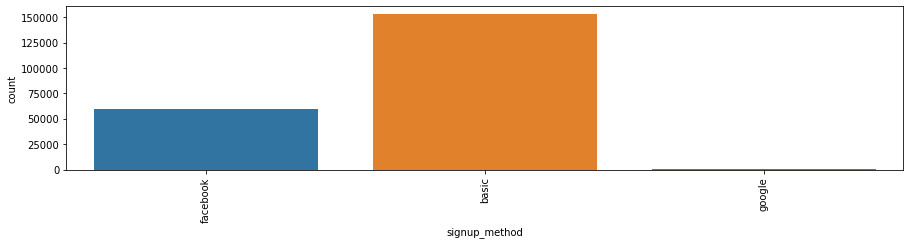

language: 
['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is'] 



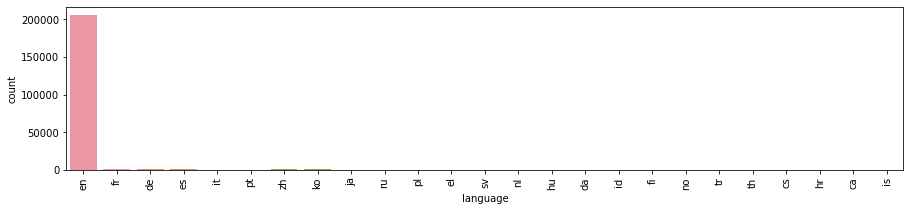

affiliate_channel: 
['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api'] 



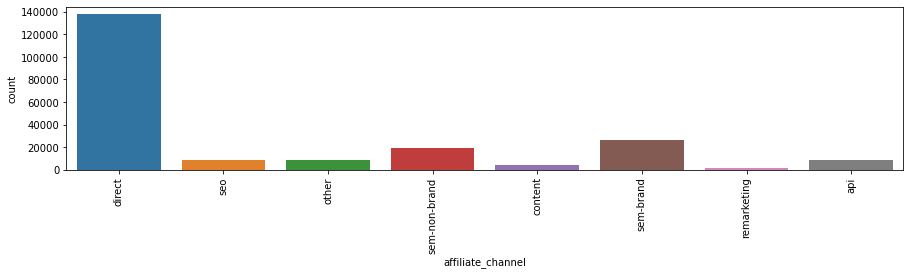

affiliate_provider: 
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum'] 



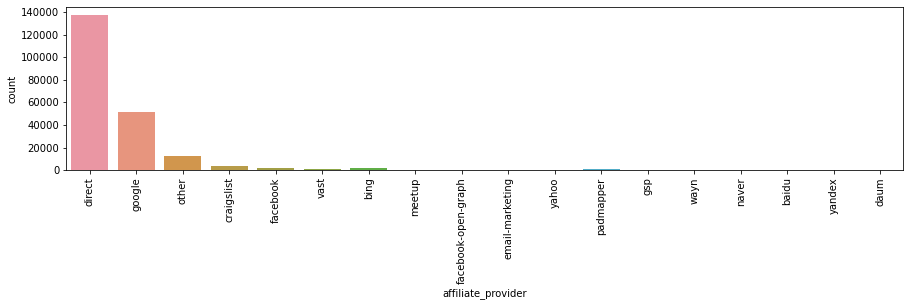

first_affiliate_tracked: 
['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops'] 



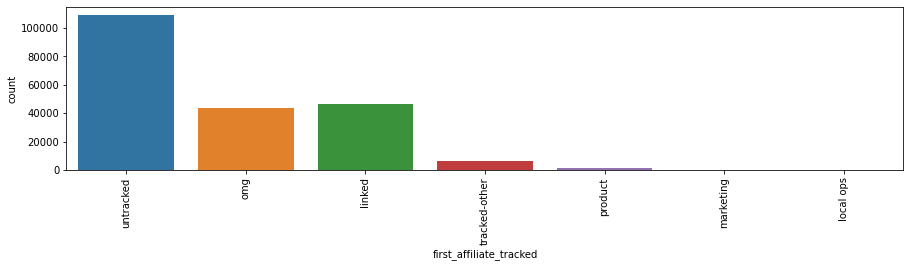

signup_app: 
['Web' 'Moweb' 'iOS' 'Android'] 



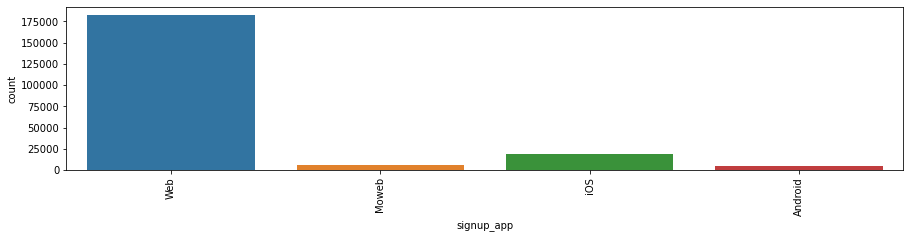

first_device_type: 
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)'] 



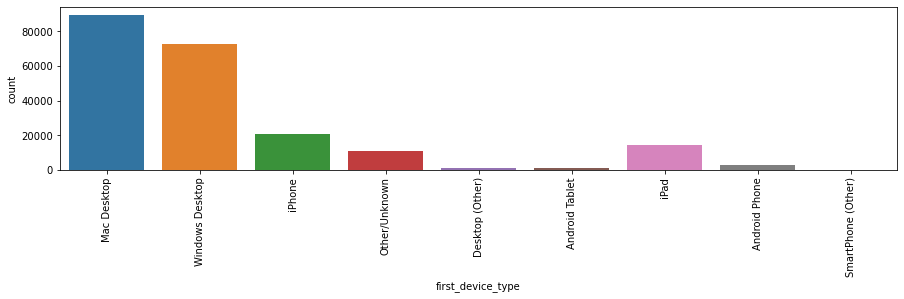

first_browser: 
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser' 'CoolNovo' 'Conkeror' 'wOSBrowser' 'Google Earth'
 'Crazy Browser' 'Mozilla' 'OmniWeb' 'PS Vita browser' 'NetNewsWire'
 'CometBird' 'Comodo Dragon' 'Flock' 'Pale Moon' 'Avant Browser'
 'Opera Mobile' 'Yandex.Browser' 'TheWorld Browser' 'SlimBrowser' 'Epic'
 'Stainless' 'Googlebot' 'Outlook 2007' 'IceDragon'] 



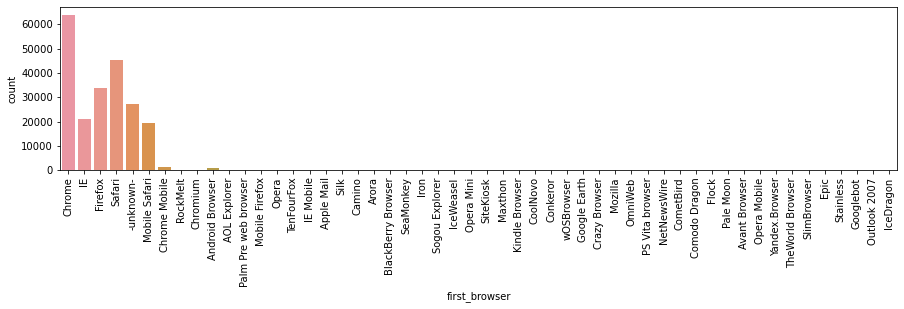

country_destination: 
['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU'] 



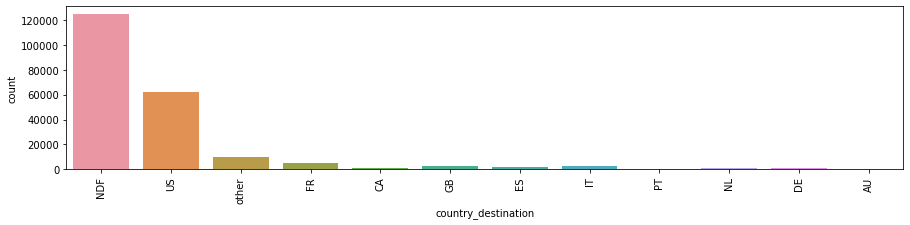

In [166]:
for col in cat_attributes_users.columns:
    print(f'{col}: \n{cat_attributes_users[col].unique()} \n')
    plt.figure(figsize=(15,3))
    sns.countplot(data=cat_attributes_users, x=col)
    plt.xticks(rotation=90)
    plt.show()

## Sessions

In [167]:
df_sessions_02 = df_sessions_01.copy()
df_sessions_02.drop('user_id', axis=1, inplace=True)

In [168]:
df_sessions_02.head()

,action,action_type,action_detail,device_type,secs_elapsed
0,lookup,NaN,NaN,Windows Desktop,319.0
1,search_results,click,view_search_results,Windows Desktop,67753.0
2,lookup,NaN,NaN,Windows Desktop,301.0
3,search_results,click,view_search_results,Windows Desktop,22141.0
4,lookup,NaN,NaN,Windows Desktop,435.0


In [169]:
cat_attributes_sessions = df_sessions_02.select_dtypes(include=['object'])
num_attributes_sessions = df_sessions_02.select_dtypes(include=['int', 'float'])

### Numerical Attributes

In [170]:
m2 = num_attributes_sessions.describe()
m2.loc['skewness'] = num_attributes_sessions.apply(lambda x: x.skew()).tolist()
m2.loc['kurtosis'] = num_attributes_sessions.apply(lambda x: x.kurtosis()).tolist()
m2.T

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
secs_elapsed,10431706.0,19405.810751,88884.243208,0.0,229.0,1147.0,8444.0,1799977.0,11.141939,154.748944


* 0 segundos?
* ver se o tempo máximo não é muito outlier

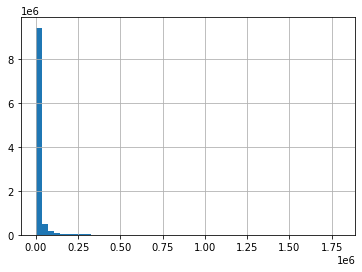

In [171]:
df_sessions_02.secs_elapsed.hist(bins=50)
plt.show()

### Categorical Attributes

In [172]:
cat_attributes_sessions.describe()

,action,action_type,action_detail,device_type
count,10488111,9441533,9441533,10567737
unique,359,10,155,14
top,show,view,view_search_results,Mac Desktop
freq,2768278,3560902,1776885,3594286


action: 
['lookup' 'search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan
 'other_hosting_reviews_first' 'hosting_social_proof' 'decision_tree'
 'recent_reservations' 'faq_experiment_ids' 'multi' 'active' 'dashboard'
 'create' 'confirm_email' 'show_personalize' 'verify' 'pending'
 'requested' 'concierge' 'faq' 'clear_reservation' 'cancellation_policies'
 'track_page_view' 'update' 'my' 'campaigns' 'notifications' 'listings'
 'unavailabilities' 'ajax_lwlb_contact' 'ajax_check_dates' 'qt2'
 'request_new_confirm_email' 'ajax_photo_widget_form_iframe'
 'facebook_auto_login' 'identity' 'qt_reply_v2' 'travel_plans_current'
 'complete_status' 'populate_from_facebook' 'kba_update' 'kba' 'login'
 'authenticate' 'calendar_tab_inner2' 'other_hosting_reviews'
 'social_connections' 'relationship' '15' 'collections' '12'
 'jumio_redirect' 'jumio_token' 'login_modal' 'domains'
 'toggle_archived_thread' 'search' 'edit_verification'

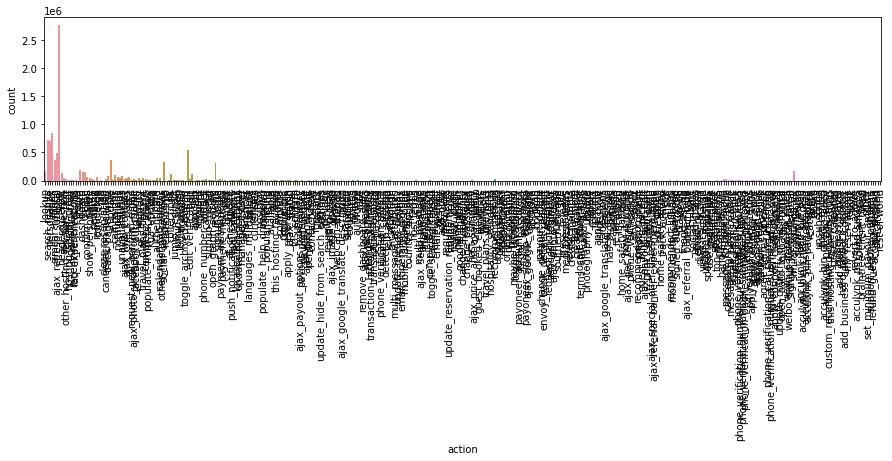

action_type: 
[nan 'click' 'data' 'view' 'submit' 'message_post' '-unknown-'
 'booking_request' 'partner_callback' 'booking_response' 'modify'] 



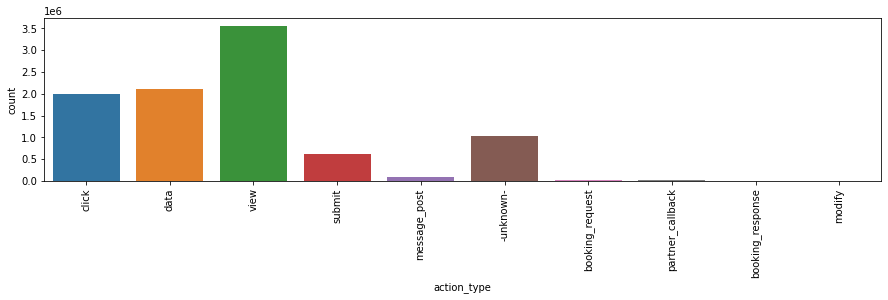

action_detail: 
[nan 'view_search_results' 'wishlist_content_update' 'similar_listings'
 'change_trip_characteristics' 'p3' 'header_userpic' 'contact_host'
 'message_post' '-unknown-' 'dashboard' 'create_user' 'confirm_email_link'
 'user_profile_content_update' 'user_profile' 'pending' 'p5'
 'create_phone_numbers' 'cancellation_policies' 'user_wishlists'
 'change_contact_host_dates' 'wishlist' 'message_thread'
 'request_new_confirm_email' 'send_message' 'your_trips' 'login_page'
 'login' 'login_modal' 'toggle_archived_thread' 'p1'
 'profile_verifications' 'edit_profile' 'oauth_login'
 'post_checkout_action' 'account_notification_settings'
 'update_user_profile' 'oauth_response' 'signup_modal' 'signup_login_page'
 'at_checkpoint' 'manage_listing' 'create_listing' 'your_listings'
 'profile_references' 'list_your_space' 'popular_wishlists'
 'listing_reviews_page' 'apply_coupon' 'user_tax_forms'
 'account_payout_preferences' 'guest_itinerary' 'guest_receipt'
 'account_privacy_settings' 'lo

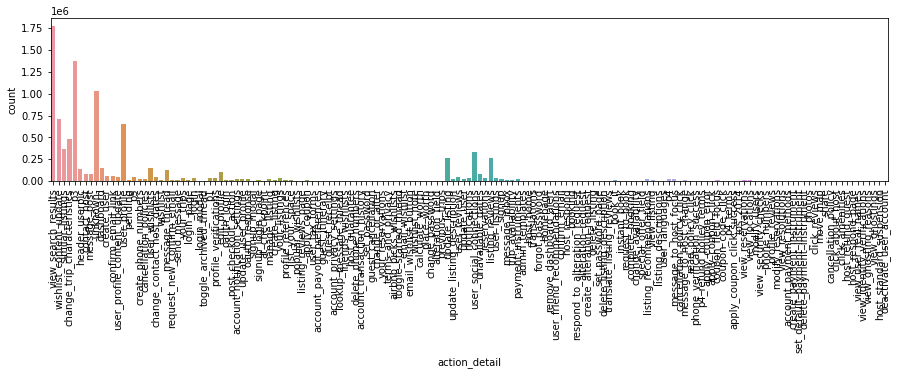

device_type: 
['Windows Desktop' '-unknown-' 'Mac Desktop' 'Android Phone' 'iPhone'
 'iPad Tablet' 'Android App Unknown Phone/Tablet' 'Linux Desktop' 'Tablet'
 'Chromebook' 'Blackberry' 'iPodtouch' 'Windows Phone' 'Opera Phone'] 



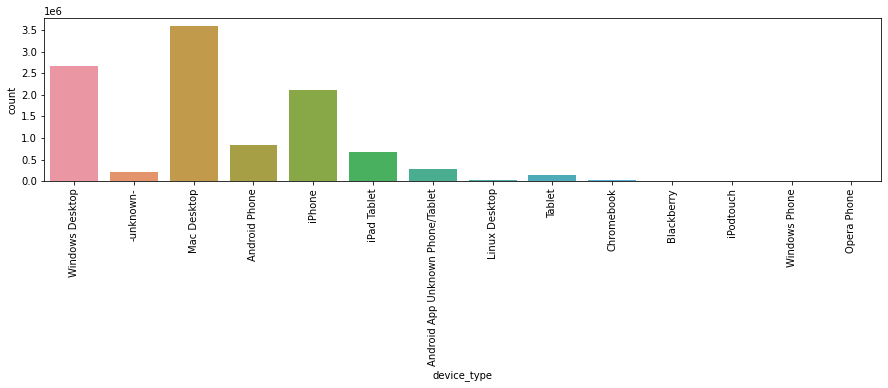

In [173]:
for col in cat_attributes_sessions.columns:
    print(f'{col}: \n{cat_attributes_sessions[col].unique()} \n')
    plt.figure(figsize=(15,3))
    sns.countplot(data=cat_attributes_sessions, x=col)
    plt.xticks(rotation=90)
    plt.show()

# 5.0 Data Cleaning

## Users

In [175]:
# remover outliers da idade
q1 = df_users_01['age'].quantile(0.25)
q3 = df_users_01['age'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

df_users_01 = df_users_01[(df_users_01['age'] >= lower_bound) & (df_users_01['age'] <= upper_bound)]

In [177]:
# na coluna gender substituir '-unknown-' por 'nan'
df_users_01.loc[df_users_01['gender'] == '-unknown-', 'gender'] = np.nan

# na coluna first_browser substituir '-unknown-' por 'nan'
df_users_01.loc[df_users_01['first_browser'] == '-unknown-', 'first_browser'] = np.nan

In [182]:
# deixar tudo em letra minúscula nas colunas categoricas
df_users_01[cat_attributes_users.columns] = df_users_01[cat_attributes_users.columns].apply(lambda x: x.str.lower())

In [199]:
# preencher date_first_booking com a data de hoje
today = datetime.datetime.today().strftime('%Y-%m-%d')
df_users_01['date_first_booking'].fillna(today, inplace=True)

## Sessions

In [184]:
# remover outliers de secs_elapsed
q1 = df_sessions_01['secs_elapsed'].quantile(0.25)
q3 = df_sessions_01['secs_elapsed'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

df_sessions_01 = df_sessions_01[(df_sessions_01['secs_elapsed'] >= lower_bound) & (df_sessions_01['secs_elapsed'] <= upper_bound)]

In [185]:
# na coluna device_type substituir '-unknown-' por 'nan'
df_sessions_01.loc[df_sessions_01['device_type'] == '-unknown-', 'device_type'] = np.nan

# na coluna action_detail substituir '-unknown-' por 'nan'
df_sessions_01.loc[df_sessions_01['action_detail'] == '-unknown-', 'action_detail'] = np.nan

# na coluna action_type substituir '-unknown-' por 'nan'
df_sessions_01.loc[df_sessions_01['action_type'] == '-unknown-', 'action_type'] = np.nan

In [189]:
# deixar tudo em letra minúscula nas colunas categoricas
df_sessions_01[cat_attributes_sessions.columns] = df_sessions_01[cat_attributes_sessions.columns].apply(lambda x: x.str.lower())

C:\Users\allan\AppData\Local\Temp\ipykernel_37900\1355702275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sessions_01[cat_attributes_sessions.columns] = df_sessions_01[cat_attributes_sessions.columns].apply(lambda x: x.str.lower())


In [190]:
df_sessions_01.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,windows desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,windows desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,windows desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,windows desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,windows desktop,115.0


# 6.0 Feature Engineering

## Users

In [ ]:
#diferença de dias entre a date_first_booking e date_account_created
df_users_01['delta1'] = (df_users_01['date_first_booking'] - df_users_01['date_account_created']).dt.days

#diferença de dias entre date_first_booking e date_first_active
df_users_01['delta2'] = (df_users_01['date_first_booking'] - df_users_01['date_first_active']).dt.days

#diferença de dias entre date_account_created e date_first_active
df_users_01['delta3'] = (df_users_01['date_account_created'] - df_users_01['date_first_active']).dt.days

In [227]:
df_users_01.head()

,id,date_account_created,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active,delta1,delta2,delta3
1,820tgsjxq7,2011-05-25,2023-09-18,male,38,facebook,0,en,seo,google,untracked,web,mac desktop,male,ndf,2009-05-23,4499,5231,732
2,4ft3gnwmtx,2010-09-28,2010-08-02,female,56,basic,3,en,direct,direct,untracked,web,windows desktop,female,us,2009-06-09,-57,419,476
3,bjjt8pjhuk,2011-12-05,2012-09-08,female,42,facebook,0,en,direct,direct,untracked,web,mac desktop,female,other,2009-10-31,278,1043,765
4,87mebub9p4,2010-09-14,2010-02-18,NaN,41,basic,0,en,direct,direct,untracked,web,mac desktop,NaN,us,2009-12-08,-208,72,280
6,lsw9q7uk0j,2010-01-02,2010-01-05,female,46,basic,0,en,other,craigslist,untracked,web,mac desktop,female,us,2010-01-02,3,3,0


## Sessions

In [192]:
df_sessions_01.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,windows desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,windows desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,windows desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,windows desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,windows desktop,115.0


In [311]:
action = df_sessions_01.pivot_table(index='user_id', columns='action', aggfunc='size', fill_value=0).reset_index()
action_type = df_sessions_01.pivot_table(index='user_id', columns='action_type', aggfunc='size', fill_value=0).reset_index()
action_detail = df_sessions_01.pivot_table(index='user_id', columns='action_detail', aggfunc='size', fill_value=0).reset_index()
device_type = df_sessions_01.pivot_table(index='user_id', columns='device_type', aggfunc='size', fill_value=0).reset_index()
secs_elapsed = df_sessions_01.pivot_table(index='user_id', values='secs_elapsed', aggfunc=('mean', 'std', 'max', 'min', 'quantile')).reset_index()

In [312]:
pivot_tables = [secs_elapsed, action, action_type, action_detail, device_type]

In [319]:
# joining the dataframes
merged_df = secs_elapsed.merge(action, on='user_id', how='left')
merged_df = merged_df.merge(action_type, on='user_id', how='left')
merged_df = merged_df.merge(action_detail, on='user_id', how='left')
sessions_data = merged_df.merge(device_type, on='user_id', how='left')

In [320]:
sessions_data.head()

,user_id,max,mean,min,quantile,std,10,11,12,15,...,chromebook,ipad tablet,iphone,ipodtouch,linux desktop,mac desktop,opera phone,tablet,windows desktop,windows phone
0,00023iyk9l,20438.0,2166.000000,0.0,820.0,4195.651103,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0
1,0010k6l0om,17450.0,2326.629630,3.0,697.0,4325.572761,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0
2,001wyh0pz8,20501.0,2641.102273,35.0,1104.0,4191.974900,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0028jgx1x1,15904.0,3469.240000,3.0,222.0,4970.775638,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002qnbzfs5,20665.0,2084.283984,0.0,408.0,3719.765276,4.0,0.0,0.0,0.0,...,0.0,0.0,731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 7.0 EDA

# 7.0 Data Preparation

# 8.0 Feature Selection

# 9.0 Modelling

# 10.0 Hyperparameter Fine Tuning

# 11.0 Final Metrics

# 12.0 Business Performance